In [5]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [6]:
data=pd.read_csv("delivery_time.csv")

In [7]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

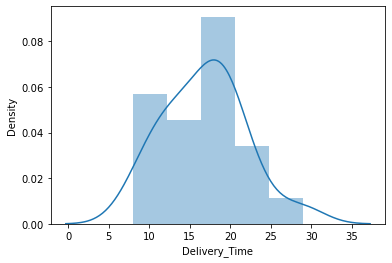

In [9]:
import seaborn as sns
sns.distplot(data['Delivery_Time'])

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

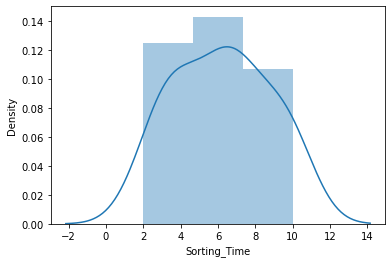

In [10]:
sns.distplot(data['Sorting_Time'])

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

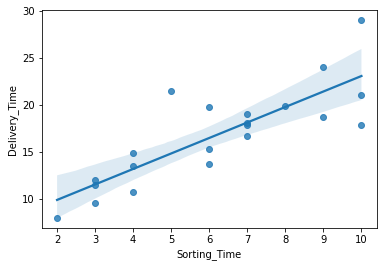

In [12]:
sns.regplot(x="Sorting_Time", y="Delivery_Time",data=data);

In [13]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Model Prediction

In [20]:
# Manual prediction for say sorting time 5
Delivery_Time = (6.582734) + (1.649020)*(5)
Delivery_Time

14.827834

In [17]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [22]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64